In [ ]:
!pip install kagglehub --quiet
!pip install torch torchvision torchaudio --quiet
!pip install opencv-python opencv-contrib-python --quiet
!pip install einops tqdm --quiet

In [ ]:
import kagglehub

datasets = {
    "hmdb51": "easonlll/hmdb51",
    "pets2009": "yeeandres/pets2009",
    "snatching": "yashtisahu/snatching-videos",
    "ucf50_v1": "rajinikanthkakarla/ucf50-latest-version",
    "ucf50_v2": "vineethakkinapalli/ucf50-action-recognition-dataset"
}

dataset_paths = {}

for name, ds in datasets.items():
    path = kagglehub.dataset_download(ds)
    dataset_paths[name] = path
    print(f"{name} dataset path:", path)

100%|██████████| 3.14G/3.14G [01:50<00:00, 30.5MB/s]

Extracting files...


hmdb51 dataset path: /root/.cache/kagglehub/datasets/easonlll/hmdb51/versions/1


100%|██████████| 790M/790M [00:27<00:00, 30.2MB/s]

Extracting files...


pets2009 dataset path: /root/.cache/kagglehub/datasets/yeeandres/pets2009/versions/1


100%|██████████| 32.7M/32.7M [00:02<00:00, 13.7MB/s]

Extracting files...


snatching dataset path: /root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1


100%|██████████| 3.04G/3.04G [01:48<00:00, 30.0MB/s]

Extracting files...


ucf50_v1 dataset path: /root/.cache/kagglehub/datasets/rajinikanthkakarla/ucf50-latest-version/versions/1


100%|██████████| 3.04G/3.04G [01:48<00:00, 30.0MB/s]

Extracting files...


ucf50_v2 dataset path: /root/.cache/kagglehub/datasets/vineethakkinapalli/ucf50-action-recognition-dataset/versions/1


In [ ]:
import os

# Define dataset_path using one of the downloaded paths, e.g., 'snatching'
dataset_path = dataset_paths["snatching"]

video_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".mp4"):
            video_files.append(os.path.join(root, file))

print("Total videos found:", len(video_files))
for v in video_files:
    print(v)

Total videos found: 18
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_9.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_13.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_12.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_6.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_2.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_11.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_10.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_18.mp4
/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1/snatching_videos/snatching_3.mp4
/root/.cache/kagglehub/datasets/yash

In [ ]:
import cv2

cap = cv2.VideoCapture(video_files[0])

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

print("Frames loaded:", len(frames))
print("Frame shape:", frames[0].shape if len(frames) > 0 else None)

Frames loaded: 179
Frame shape: (480, 480, 3)


In [ ]:
dataset_paths["snatching"]

'/root/.cache/kagglehub/datasets/yashtisahu/snatching-videos/versions/1'

In [ ]:
!git clone https://github.com/princeton-vl/RAFT.git

Cloning into 'RAFT'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 155 (delta 1), reused 0 (delta 0), pack-reused 149 (from 4)
Receiving objects: 100% (155/155), 10.02 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd RAFT
!wget -O raft-sintel.zip https://dl.dropboxusercontent.com/s/4j4z58wuv8o0mfz/raft-sintel.pth
!unzip raft-sintel.zip
%cd ..

/content/RAFT
--2026-02-06 14:17:31--  https://dl.dropboxusercontent.com/s/4j4z58wuv8o0mfz/raft-sintel.pth
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.85.15, 2620:100:6035:15::a27d:550f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.85.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81977417 (78M) [application/zip]
Saving to: ‘raft-sintel.zip’

raft-sintel.zip     100%[===================>]  78.18M  28.2MB/s    in 2.8s    

2026-02-06 14:17:35 (28.2 MB/s) - ‘raft-sintel.zip’ saved [81977417/81977417]

Archive:  raft-sintel.zip
   creating: models/
  inflating: models/raft-kitti.pth   
  inflating: models/raft-sintel.pth  
  inflating: models/raft-chairs.pth  
  inflating: models/raft-things.pth  
  inflating: models/raft-small.pth   
/content


In [ ]:
import sys
import torch
from types import SimpleNamespace
from collections import OrderedDict
import os

sys.path.append("/content/RAFT")
sys.path.append("/content/RAFT/core")

# Diagnostic: Check if the file exists
raft_file_path = "/content/RAFT/core/raft.py"
if not os.path.exists(raft_file_path):
    print(f"ERROR: RAFT file not found at {raft_file_path}")
    print("Current working directory:", os.getcwd())
    print("Contents of /content/RAFT:", os.listdir("/content/RAFT") if os.path.exists("/content/RAFT") else "<not found>")
    print("Contents of /content/RAFT/core:", os.listdir("/content/RAFT/core") if os.path.exists("/content/RAFT/core") else "<not found>")
    sys.exit(1) # Exit to prevent further errors
else:
    print(f"✅ RAFT file found at {raft_file_path}")

print("sys.path:", sys.path)

from core.raft import RAFT
from core.utils.utils import InputPadder

device = "cuda" if torch.cuda.is_available() else "cpu"

# Custom class to handle the 'in' operator compatibility with RAFT
class ArgsForRAFT:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

    def __contains__(self, key):
        # This allows the 'in' operator to check for attribute existence
        return key in self.__dict__

# Define the arguments using our custom class
args = ArgsForRAFT(
    small=False,
    mixed_precision=False,
    alternate_corr=False,
    dropout=0 # Ensure dropout is always present
)

model = RAFT(args)

# Load the state_dict and remove 'module.' prefix if present
state_dict = torch.load("/content/RAFT/models/raft-sintel.pth", map_location=torch.device('cpu')) # FIX: Added map_location
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] if k.startswith('module.') else k # remove `module.` prefix
    new_state_dict[name] = v

model.load_state_dict(new_state_dict)
model = model.to(device).eval()

print("✅ RAFT model loaded successfully")

✅ RAFT file found at /content/RAFT/core/raft.py
sys.path: ['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/content/RAFT', '/content/RAFT/core']
✅ RAFT model loaded successfully


In [ ]:
import numpy as np
import cv2

# --------------------------------
# Orientation Histogram
# --------------------------------
def orientation_histogram(dx, dy, bins=8, mag_thresh=0.01):
    # magnitude + angle
    mag = np.sqrt(dx**2 + dy**2)
    ang = np.arctan2(dy, dx) + np.pi

    # threshold to remove noise
    mask = mag > mag_thresh
    ang = ang[mask]
    mag = mag[mask]

    hist, _ = np.histogram(
        ang,
        bins=bins,
        range=(0, 2*np.pi),
        weights=mag
    )

    # normalize histogram
    hist = hist / (np.linalg.norm(hist) + 1e-6)
    return hist

# --------------------------------
# MBH per spatial grid
# --------------------------------
def compute_mbh(flow, grid=(2, 2), bins=8):
    u = flow[..., 0]
    v = flow[..., 1]

    du_dx = cv2.Sobel(u, cv2.CV_32F, 1, 0, ksize=3)
    du_dy = cv2.Sobel(u, cv2.CV_32F, 0, 1, ksize=3)
    dv_dx = cv2.Sobel(v, cv2.CV_32F, 1, 0, ksize=3)
    dv_dy = cv2.Sobel(v, cv2.CV_32F, 0, 1, ksize=3)

    h, w = u.shape
    gh, gw = grid
    cell_h, cell_w = h // gh, w // gw

    mbh_feature = []

    for i in range(gh):
        for j in range(gw):
            y1, y2 = i * cell_h, (i + 1) * cell_h
            x1, x2 = j * cell_w, (j + 1) * cell_w

            hist_u = orientation_histogram(
                du_dx[y1:y2, x1:x2],
                du_dy[y1:y2, x1:x2],
                bins
            )
            hist_v = orientation_histogram(
                dv_dx[y1:y2, x1:x2],
                dv_dy[y1:y2, x1:x2],
                bins
            )

            mbh_feature.extend(hist_u)
            mbh_feature.extend(hist_v)

    return np.array(mbh_feature)

In [ ]:
import torch
import numpy as np
import cv2 # cv2 is already used in the loop, good to explicitly import if not global

FRAME_STRIDE = 2
WINDOW_SIZE = 10

def compute_raft_flow(frame1, frame2):
    """
    frame1, frame2: RGB images (H, W, 3)
    returns: optical flow (H, W, 2)
    """
    frame1 = torch.from_numpy(frame1).permute(2, 0, 1).float()[None].to(device)
    frame2 = torch.from_numpy(frame2).permute(2, 0, 1).float()[None].to(device)

    # InputPadder, model, and device are expected to be available from previously executed cells
    padder = InputPadder(frame1.shape)
    frame1, frame2 = padder.pad(frame1, frame2)

    with torch.no_grad():
        _, flow = model(frame1, frame2, iters=20, test_mode=True)

    flow = padder.unpad(flow)
    flow = flow[0].permute(1, 2, 0).cpu().numpy()
    return flow


all_mbh_descriptors = []
window_buffer = []

for video_path in video_files:
    cap = cv2.VideoCapture(video_path)

    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret or prev_frame is None:
        print(f"Skipping video {video_path}: Could not read initial frame.")
        cap.release()
        continue # Skip to the next video

    # Process the first frame
    prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2RGB)
    prev = cv2.resize(prev, (256, 256))

    frame_count = 0

    while True:
        # Read the current frame
        ret, curr_frame = cap.read()
        if not ret or curr_frame is None: # Check if frame was successfully read
            break # End of video or error reading frame

        # Process the current frame
        curr = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2RGB)
        curr = cv2.resize(curr, (256, 256))

        frame_count += 1

        # Apply frame stride
        if frame_count % FRAME_STRIDE != 0:
            prev = curr
            continue

        # Compute RAFT optical flow
        flow = compute_raft_flow(prev, curr)

        # Compute MBH feature (compute_mbh is assumed to be defined in a previously executed cell)
        mbh_vec = compute_mbh(flow)

        window_buffer.append(mbh_vec)

        # Temporal aggregation
        if len(window_buffer) == WINDOW_SIZE:
            descriptor = np.mean(window_buffer, axis=0)
            all_mbh_descriptors.append(descriptor)
            window_buffer = []

        prev = curr # Update prev for the next iteration

    cap.release() # Release video capture object

print("Total MBH descriptors:", len(all_mbh_descriptors))

/content/RAFT/core/raft.py:99: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):
/content/RAFT/core/raft.py:110: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):
/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/RAFT/core/raft.py:127: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):


Total MBH descriptors: 256


In [ ]:
import os
from tqdm import tqdm

# Use snatching-videos dataset path
video_root = dataset_paths["snatching"]

video_files = []
for root, _, files in os.walk(video_root):
    for f in files:
        if f.endswith(".mp4"):
            video_files.append(os.path.join(root, f))

print("Total videos found:", len(video_files))

Total videos found: 18


In [ ]:
import cv2
import numpy as np

def compute_raft_flow(frame1, frame2):
    """
    frame1, frame2: RGB images (H, W, 3)
    returns: optical flow (H, W, 2)
    """
    frame1 = torch.from_numpy(frame1).permute(2, 0, 1).float()[None].to(device)
    frame2 = torch.from_numpy(frame2).permute(2, 0, 1).float()[None].to(device)

    padder = InputPadder(frame1.shape)
    frame1, frame2 = padder.pad(frame1, frame2)

    with torch.no_grad():
        _, flow = model(frame1, frame2, iters=20, test_mode=True)

    flow = padder.unpad(flow)
    flow = flow[0].permute(1, 2, 0).cpu().numpy()
    return flow

In [ ]:
import os
import cv2
import numpy as np
import torch
import kagglehub

import sys
from collections import OrderedDict
from types import SimpleNamespace

# Ensure RAFT modules are in sys.path
sys.path.append("/content/RAFT")
sys.path.append("/content/RAFT/core")

# Import RAFT components after sys.path is updated
from core.raft import RAFT
from core.utils.utils import InputPadder

device = "cuda" if torch.cuda.is_available() else "cpu"

# Custom class to handle the 'in' operator compatibility with RAFT
class ArgsForRAFT:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

    def __contains__(self, key):
        # This allows the 'in' operator to check for attribute existence
        return key in self.__dict__

# Define the arguments using our custom class
args = ArgsForRAFT(
    small=False,
    mixed_precision=False,
    alternate_corr=False,
    dropout=0 # Ensure dropout is always present
)

model = RAFT(args)

# Load the state_dict and remove 'module.' prefix if present
state_dict = torch.load("/content/RAFT/models/raft-sintel.pth", map_location=torch.device('cpu'))
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] if k.startswith('module.') else k # remove `module.` prefix
    new_state_dict[name] = v

model.load_state_dict(new_state_dict)
model = model.to(device).eval()

# --------------------------------
# Orientation Histogram
# --------------------------------
def orientation_histogram(dx, dy, bins=8, mag_thresh=0.01):
    # magnitude + angle
    mag = np.sqrt(dx**2 + dy**2)
    ang = np.arctan2(dy, dx) + np.pi

    # threshold to remove noise
    mask = mag > mag_thresh
    ang = ang[mask]
    mag = mag[mask]

    hist, _ = np.histogram(
        ang,
        bins=bins,
        range=(0, 2*np.pi),
        weights=mag
    )

    # normalize histogram
    hist = hist / (np.linalg.norm(hist) + 1e-6)
    return hist

# --------------------------------
# MBH per spatial grid
# --------------------------------
def compute_mbh(flow, grid=(2, 2), bins=8):
    u = flow[..., 0]
    v = flow[..., 1]

    du_dx = cv2.Sobel(u, cv2.CV_32F, 1, 0, ksize=3)
    du_dy = cv2.Sobel(u, cv2.CV_32F, 0, 1, ksize=3)
    dv_dx = cv2.Sobel(v, cv2.CV_32F, 1, 0, ksize=3)
    dv_dy = cv2.Sobel(v, cv2.CV_32F, 0, 1, ksize=3)

    h, w = u.shape
    gh, gw = grid
    cell_h, cell_w = h // gh, w // gw

    mbh_feature = []

    for i in range(gh):
        for j in range(gw):
            y1, y2 = i * cell_h, (i + 1) * cell_h
            x1, x2 = j * cell_w, (j + 1) * cell_w

            hist_u = orientation_histogram(
                du_dx[y1:y2, x1:x2],
                du_dy[y1:y2, x1:x2],
                bins
            )
            hist_v = orientation_histogram(
                dv_dx[y1:y2, x1:x2],
                dv_dy[y1:y2, x1:x2],
                bins
            )

            mbh_feature.extend(hist_u)
            mbh_feature.extend(hist_v)

    return np.array(mbh_feature)

def compute_raft_flow(frame1, frame2):
    """
    frame1, frame2: RGB images (H, W, 3)
    returns: optical flow (H, W, 2)
    """
    frame1 = torch.from_numpy(frame1).permute(2, 0, 1).float()[None].to(device)
    frame2 = torch.from_numpy(frame2).permute(2, 0, 1).float()[None].to(device)

    padder = InputPadder(frame1.shape)
    frame1, frame2 = padder.pad(frame1, frame2)

    with torch.no_grad():
        _, flow = model(frame1, frame2, iters=20, test_mode=True)

    flow = padder.unpad(flow)
    flow = flow[0].permute(1, 2, 0).cpu().numpy()
    return flow


# Use snatching-videos dataset path
# Ensure dataset_paths is defined and contains 'snatching'
if 'dataset_paths' not in globals() or 'snatching' not in globals().get('dataset_paths', {}):
    # If dataset_paths is not defined or 'snatching' key is missing,
    # download it specifically. This handles kernel resets or out-of-order execution.
    snatching_dataset_id = "yashtisahu/snatching-videos"
    snatching_path = kagglehub.dataset_download(snatching_dataset_id)
    if 'dataset_paths' not in globals():
        dataset_paths = {}
    dataset_paths['snatching'] = snatching_path
    print(f"snatching dataset path ensured: {snatching_path}")

video_root = dataset_paths["snatching"]

video_files = []
for root, _, files in os.walk(video_root):
    for f in files:
        if f.endswith(".mp4"):
            video_files.append(os.path.join(root, f))

# Define stride and window size for temporal aggregation
FRAME_STRIDE = 2
WINDOW_SIZE = 10

all_mbh_descriptors = []
window_buffer = []

for idx, video_path in enumerate(video_files):
    print(f"\nProcessing video {idx+1}/{len(video_files)}")

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Cannot open video {video_path}, skipping")
        continue

    # Read the first frame
    ret, prev_frame_orig = cap.read()
    if not ret or prev_frame_orig is None:
        print(f"Skipping video {video_path}: Could not read initial frame.")
        cap.release()
        continue

    prev = cv2.cvtColor(prev_frame_orig, cv2.COLOR_BGR2RGB)
    prev = cv2.resize(prev, (256, 256))

    frame_count = 0

    while True:
        ret, curr_frame_orig = cap.read()
        if not ret or curr_frame_orig is None:
            break

        curr = cv2.cvtColor(curr_frame_orig, cv2.COLOR_BGR2RGB)
        curr = cv2.resize(curr, (256, 256))

        frame_count += 1

        # Apply frame stride
        if frame_count % FRAME_STRIDE != 0:
            prev = curr
            continue

        # Compute RAFT optical flow
        flow = compute_raft_flow(prev, curr)

        # Compute MBH feature
        mbh_vec = compute_mbh(flow)

        window_buffer.append(mbh_vec)

        # Temporal aggregation
        if len(window_buffer) == WINDOW_SIZE:
            descriptor = np.mean(window_buffer, axis=0)
            all_mbh_descriptors.append(descriptor)
            window_buffer = [] # Reset buffer for the next window

        prev = curr # Update prev for the next iteration

    cap.release()

    # If there are remaining descriptors in the window_buffer, average them
    if window_buffer:
        descriptor = np.mean(window_buffer, axis=0)
        all_mbh_descriptors.append(descriptor)
        window_buffer = [] # Clear buffer after processing video

    print(f"✅ Done video {idx+1}. Total descriptors so far: {len(all_mbh_descriptors)}")

print(f"Total aggregated MBH descriptors: {len(all_mbh_descriptors)}")


Processing video 1/18
✅ Done video 1. Total descriptors so far: 9

Processing video 2/18
✅ Done video 2. Total descriptors so far: 21

Processing video 3/18
✅ Done video 3. Total descriptors so far: 32

Processing video 4/18
✅ Done video 4. Total descriptors so far: 58

Processing video 5/18
✅ Done video 5. Total descriptors so far: 69

Processing video 6/18
✅ Done video 6. Total descriptors so far: 83

Processing video 7/18
✅ Done video 7. Total descriptors so far: 105

Processing video 8/18
✅ Done video 8. Total descriptors so far: 115

Processing video 9/18
✅ Done video 9. Total descriptors so far: 144

Processing video 10/18
✅ Done video 10. Total descriptors so far: 149

Processing video 11/18
✅ Done video 11. Total descriptors so far: 161

Processing video 12/18
✅ Done video 12. Total descriptors so far: 176

Processing video 13/18
✅ Done video 13. Total descriptors so far: 198

Processing video 14/18
✅ Done video 14. Total descriptors so far: 210

Processing video 15/18
✅ Done 

In [ ]:
all_mbh_descriptors = np.array(all_mbh_descriptors)
np.save("mbh_descriptors_fixed.npy", all_mbh_descriptors)

print("Final MBH shape:", all_mbh_descriptors.shape)

Final MBH shape: (263, 64)


In [ ]:
print("Min:", all_mbh_descriptors.min())
print("Max:", all_mbh_descriptors.max())
print("Any NaN:", np.isnan(all_mbh_descriptors).any())

Min: 0.0109217465
Max: 0.8839582
Any NaN: False


In [ ]:
import cv2
import numpy as np

def extract_mbh(flow):
    """
    flow: (H, W, 2) optical flow from RAFT
    returns: MBH feature vector
    """
    fx = flow[:, :, 0]
    fy = flow[:, :, 1]

    mbhx = cv2.Sobel(fx, cv2.CV_32F, 1, 0, ksize=3)
    mbhy = cv2.Sobel(fy, cv2.CV_32F, 0, 1, ksize=3)

    return [
        np.mean(np.abs(mbhx)),
        np.mean(np.abs(mbhy))
    ]

In [ ]:
import numpy as np
all_mbh_descriptors = np.array(all_mbh_descriptors)
np.save("mbh_features_raft.npy", all_mbh_descriptors)

print("Saved MBH features:", all_mbh_descriptors.shape)

Saved MBH features: (263, 64)


In [ ]:
import torch
print(torch.cuda.is_available())
print(next(model.parameters()).is_cuda)


True
True


In [ ]:
import kagglehub

dataset_path = kagglehub.dataset_download("yashtisahu/snatching-videos")
print("Dataset downloaded to:", dataset_path)


Using Colab cache for faster access to the 'snatching-videos' dataset.
Dataset downloaded to: /kaggle/input/snatching-videos


In [ ]:
!apt-get update
!apt-get install -y ffmpeg


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,341 kB]
Get:6 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 http://archive.ubuntu.com/ubu

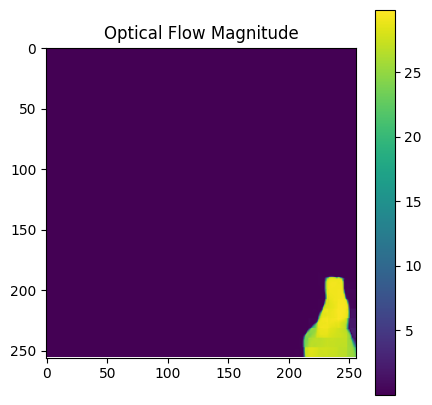

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load specific frames for visualization, using a known good path from video_files
video_path = video_files[0] # Use the first video from the successfully loaded list
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    ret1, frame1_orig = cap.read()
    ret2, frame2_orig = cap.read()
    cap.release()

    if ret1 and ret2 and frame1_orig is not None and frame2_orig is not None:
        # Convert frames to RGB and resize them for RAFT input
        prev = cv2.cvtColor(frame1_orig, cv2.COLOR_BGR2RGB)
        curr = cv2.cvtColor(frame2_orig, cv2.COLOR_BGR2RGB)
        prev = cv2.resize(prev, (256, 256))
        curr = cv2.resize(curr, (256, 256))

        flow = compute_raft_flow(prev, curr)

        plt.figure(figsize=(5,5))
        plt.imshow(np.sqrt(flow[...,0]**2 + flow[...,1]**2))
        plt.title("Optical Flow Magnitude")
        plt.colorbar()
        plt.show()
    else:
        print(f"Could not read enough frames from {video_path} for visualization.")
else:
    print(f"Error: Could not open video file {video_path} for visualization.")

In [ ]:
print(flow.min(), flow.max(), flow.mean())


-2.4065096 27.456858 0.49744466


In [ ]:
print("MBH shape:", np.array(all_mbh_descriptors).shape)
print("Sample MBH vector:", all_mbh_descriptors[0][:10])

MBH shape: (263, 64)
Sample MBH vector: [0.4444651  0.28004587 0.20676668 0.3254077  0.3875069  0.3811651
 0.3823296  0.3428455  0.36455566 0.32692283]


In [ ]:
video_path = "/content/snatching_videos/snatching_1.mp4"


In [ ]:
import cv2
import os

# Use a correct video path for testing
# Assuming video_files is available and contains valid paths
# Or, directly construct the path if video_files might not be updated:
video_test_path = os.path.join(dataset_paths["snatching"], "snatching_videos", "snatching_1.mp4")

cap = cv2.VideoCapture(video_test_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_test_path}")
    # Initialize with default values so print statements don't error later
    frame_count = 0
    m_features = []
else:
    ret, prev_frame = cap.read()
    if not ret or prev_frame is None:
        print(f"Error: Could not read first frame from {video_test_path}")
        frame_count = 0
        m_features = []
    else:
        prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2RGB)
        # Optionally resize if needed, consistent with other processing
        prev = cv2.resize(prev, (256, 256))

        frame_count = 0
        m_features = [] # Initialize m_features

        while True:
            ret, curr_frame = cap.read()
            if not ret or curr_frame is None:
                break

            curr = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2RGB)
            curr = cv2.resize(curr, (256, 256))

            frame_count += 1

            flow = compute_raft_flow(prev, curr)
            mbh = extract_mbh(flow)
            m_features.append(mbh)

            prev = curr

    cap.release()

print("Frames processed:", frame_count)
print("MBH vectors generated:", len(m_features))



Frames processed: 484
MBH vectors generated: 484


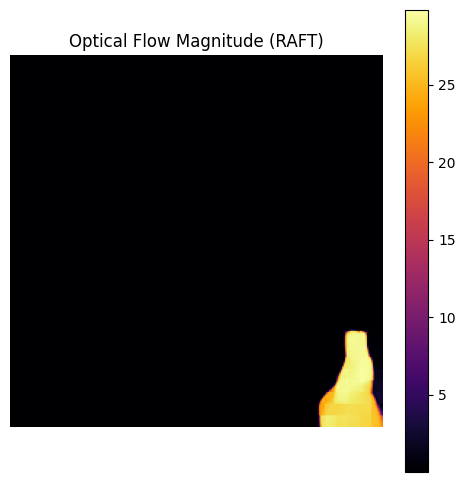

Flow shape: (256, 256, 2)
Flow min/max: -2.4065096 27.456858


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
# Use a correct video path from the loaded dataset
video_path = video_files[0] # Using the first video from video_files list

cap = cv2.VideoCapture(video_path)

# Check if video was opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
    # Exit or handle the error appropriately
    cap.release()
else:
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()

    # Check if frames were read successfully
    if not ret or frame1 is None or frame2 is None:
        print("Error: Could not read frames from video.")
        cap.release()
    else:
        cap.release()

        # Convert to RGB and resize for RAFT
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        frame1 = cv2.resize(frame1, (256, 256))
        frame2 = cv2.resize(frame2, (256, 256))

        # Compute RAFT optical flow
        flow = compute_raft_flow(frame1, frame2)

        # Compute flow magnitude
        magnitude = np.sqrt(flow[...,0]**2 + flow[...,1]**2)

        # Show result
        plt.figure(figsize=(6,6))
        plt.imshow(magnitude, cmap='inferno')
        plt.colorbar()
        plt.title("Optical Flow Magnitude (RAFT)")
        plt.axis("off")
        plt.show()

        print("Flow shape:", flow.shape)
        print("Flow min/max:", flow.min(), flow.max())

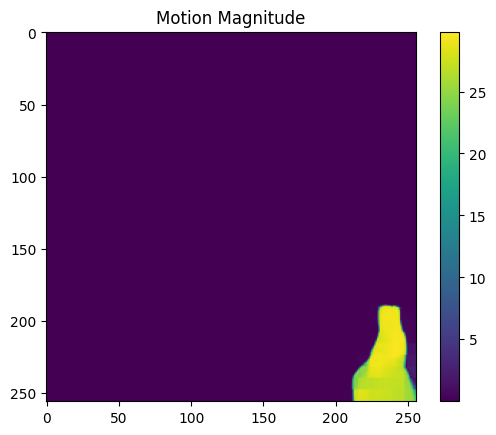

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mag = np.sqrt(flow[...,0]**2 + flow[...,1]**2)

plt.imshow(mag)
plt.title("Motion Magnitude")
plt.colorbar()
plt.show()
